# Ejercicio 11
# Práctica 3
# Javier Francisco Castilla Jiménez 

In [34]:
import numpy as np 
import matplotlib.pyplot as plt
import NeuralFunctJC as nrn
plt.style.use('seaborn')

In [35]:
neuronas=['a','A','B','C','D','E','F','G','H','I']
clase=['GG','GE','EG','EE']
llaves1=['estimulo1A','estimulo1E']
llaves2=['estimulo2A','estimulo2E']

In [36]:
#carguemos los tiempos de las neuronas de S1
TS1a=nrn.importar('TiemposNeuS1.csv')
TS1A=nrn.importar('TiemposNeuS1A.csv')
TS1B=nrn.importar('TiemposNeuS1B.csv')
TS1C=nrn.importar('TiemposNeuS1C.csv')
TS1D=nrn.importar('TiemposNeuS1D.csv')
TS1E=nrn.importar('TiemposNeuS1E.csv')
TS1F=nrn.importar('TiemposNeuS1F.csv')
TS1G=nrn.importar('TiemposNeuS1G.csv')
TS1H=nrn.importar('TiemposNeuS1H.csv')
TS1I=nrn.importar('TiemposNeuS1I.csv')
tiemposS1={'a':TS1a,'A':TS1A,'B':TS1B,'C':TS1C,'D':TS1D,'E':TS1E,'F':TS1F,'G':TS1G,'H':TS1H,'I':TS1I} # lista de listas con los np.ndarrays de lod tiempos de ocurrencia de las espigas

In [37]:
bqa=list(nrn.bloques(nrn.abrir('TiemposNeuS1.csv')))
bqA=list(nrn.bloques(nrn.abrir('TiemposNeuS1A.csv')))
bqB=list(nrn.bloques(nrn.abrir('TiemposNeuS1B.csv')))
bqC=list(nrn.bloques(nrn.abrir('TiemposNeuS1C.csv')))
bqD=list(nrn.bloques(nrn.abrir('TiemposNeuS1D.csv')))
bqE=list(nrn.bloques(nrn.abrir('TiemposNeuS1E.csv')))
bqF=list(nrn.bloques(nrn.abrir('TiemposNeuS1F.csv')))
bqG=list(nrn.bloques(nrn.abrir('TiemposNeuS1G.csv')))
bqH=list(nrn.bloques(nrn.abrir('TiemposNeuS1H.csv')))
bqI=list(nrn.bloques(nrn.abrir('TiemposNeuS1I.csv')))
bqs={'a':bqa,'A':bqA,'B':bqB,'C':bqC,'D':bqD,'E':bqE,'F':bqF,'G':bqG,'H':bqH,'I':bqI} 

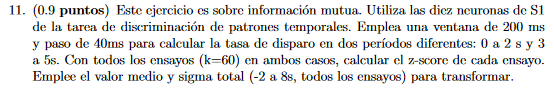

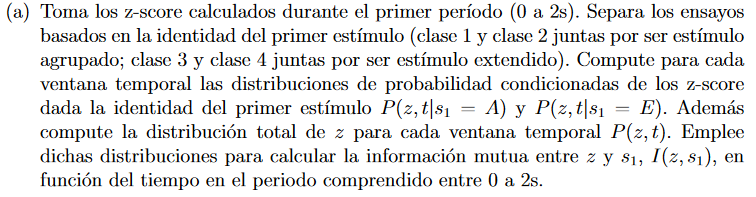

In [38]:
# todas las tasas de disparo en diccionario de neuronas
Ts=nrn.dicneuronrate(tiemposS1,neuronas,start=-2,stop=8,paso=0.04,ventana=0.2)
ms=dict() #diccionario para la media y la sigma totales de una neurona
for neuron in neuronas:
    mu=np.mean(Ts[neuron])
    sg=np.std(Ts[neuron])
    ms.update({neuron:(mu,sg)}) 
############## tasas de disparo en periodos 0 a 2s y 3 a 5s
Ts_p1=nrn.dicneuronrate(tiemposS1,neuronas,start=0,stop=2,paso=0.04,ventana=0.2)
Ts_p2=nrn.dicneuronrate(tiemposS1,neuronas,start=3,stop=5,paso=0.04,ventana=0.2)

C:\Users\sound\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\01.Quinto_Semestre\1.Modelos computacionales\1.Proba y Estadística\Practica 3\Ejercicio 11\NeuralFunctJC.py:636: RuntimeWarning: invalid value encountered in true_divide
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
C:\Users\sound\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\01.Quinto_Semestre\1.Modelos computacionales\1.Proba y Estadística\Practica 3\Ejercicio 11\NeuralFunctJC.py:636: RuntimeWarning: divide by zero encountered in log2
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
C:\Users\sound\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\01.Quinto_Semestre\1.Modelos computacionales\1.Proba y Estadística\Practica 3\Ejercicio 11\NeuralFunctJC.py:636: RuntimeWarning: invalid value encountered in multiply
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))


El valor máximo de info_mutua de Shanon las neuronas usando z total es: 0.7669556711693868
Para la neuronas  0.36 s es el momento más informativo


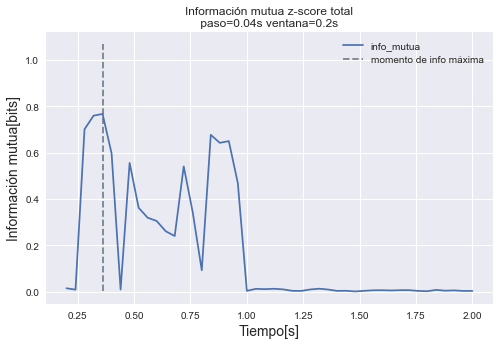

In [39]:
################# z-score total en primer periodo
zs_p1=dict()# diccionario vacio
for neuron in neuronas:
    z=nrn.zej11(Ts_p1[neuron],ms[neuron]) # cada z corresponde un array de z-score dónde cada
    zs_p1.update({neuron:z})
########## z-score separada de acuerdo a primer estímulo
zxest_1=nrn.txprimerest(zs_p1,neuronas,llaves1,bqs)#z separado
zest1_tot=nrn.ztot(zxest_1,neuronas,llaves1)
zest1_one=nrn.z_one(zest1_tot,llaves1)
probasest1=nrn.P_ventana_Tn(zest1_tot,zest1_one,10,llaves1)
esprob1={a:1/2 for a in llaves1}
bsup1,nven1=nrn.bordesup(start=0,stop=2,paso=0.04,ventana=0.2,nv=True)
shanon_est1=nrn.I_one(probasest1,llaves1,esprob1,nven1)  

####graficando de acuerdo al primer estímulo
y=shanon_est1['dtotal']
maximo=np.max(y)
minimo=np.min(y)
t_maxinfo=bsup1[np.nonzero(y==maximo)]
print('El valor máximo de info_mutua de Shanon las neuronas usando z total es:',maximo) 
print('Para la neuronas ',t_maxinfo[0],'s es el momento más informativo')
fig = plt.figure(figsize=(8,5))
plt.plot(bsup1,y,label='info_mutua')
plt.vlines(t_maxinfo,minimo,maximo+0.3,ls="--",color="slategray",label="momento de info máxima")
plt.xlabel("Tiempo[s]",fontsize=14)
plt.ylabel("Información mutua[bits]",fontsize=14)
plt.title("Información mutua z-score total\n paso=0.04s ventana=0.2s ")
plt.legend(fontsize="medium",shadow=True,fancybox=True)
plt.show()

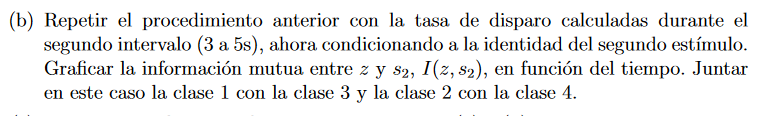

C:\Users\sound\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\01.Quinto_Semestre\1.Modelos computacionales\1.Proba y Estadística\Practica 3\Ejercicio 11\NeuralFunctJC.py:636: RuntimeWarning: invalid value encountered in true_divide
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
C:\Users\sound\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\01.Quinto_Semestre\1.Modelos computacionales\1.Proba y Estadística\Practica 3\Ejercicio 11\NeuralFunctJC.py:636: RuntimeWarning: divide by zero encountered in log2
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
C:\Users\sound\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\01.Quinto_Semestre\1.Modelos computacionales\1.Proba y Estadística\Practica 3\Ejercicio 11\NeuralFunctJC.py:636: RuntimeWarning: invalid value encountered in multiply
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))


El valor máximo de info_mutua de Shanon las neuronas usando z total es: 0.7808309554397679
Para la neuronas  3.36 s es el momento más informativo


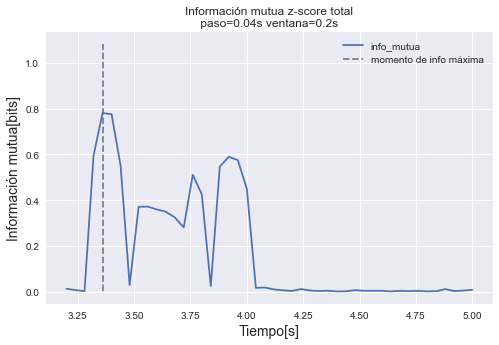

In [40]:
################# z-score en el segundo periodo
zs_p2=dict()# diccionario vacio
for neuron in neuronas:
    z=nrn.zej11(Ts_p2[neuron],ms[neuron]) # cada z corresponde un array de z-score dónde cada fila es un ensayo y cada columna un ventana temporal. En este caso el número de ensayos varía según la neurona pero el número de ventanas es 531
    zs_p2.update({neuron:z})# agrego un par llave:valor al diccionario de z por neurona
########## z-score separada de acuerdo a primer estímulo
zxest_2=nrn.txsegundoest(zs_p2,neuronas,llaves2,bqs)#z separado
zest2_tot=nrn.ztot(zxest_2,neuronas,llaves2)
zest2_one=nrn.z_one(zest2_tot,llaves2)
probasest2=nrn.P_ventana_Tn(zest2_tot,zest2_one,10,llaves2)
esprob2={a:1/2 for a in llaves2}
bsup2,nven2=nrn.bordesup(start=3,stop=5,paso=0.04,ventana=0.2,nv=True)
shanon_est2=nrn.I_one(probasest2,llaves2,esprob2,nven2) 

####graficando de acuerdo al segundo estímulo
y=shanon_est2['dtotal']
maximo=np.max(y)
minimo=np.min(y)
t_maxinfo=bsup2[np.nonzero(y==maximo)]
print('El valor máximo de info_mutua de Shanon las neuronas usando z total es:',maximo) 
print('Para la neuronas ',t_maxinfo[0],'s es el momento más informativo')
fig = plt.figure(figsize=(8,5))
plt.plot(bsup2,y,label='info_mutua')
plt.vlines(t_maxinfo,minimo,maximo+0.3,ls="--",color="slategray",label="momento de info máxima")
plt.xlabel("Tiempo[s]",fontsize=14)
plt.ylabel("Información mutua[bits]",fontsize=14)
plt.title("Información mutua z-score total\n paso=0.04s ventana=0.2s ")
plt.legend(fontsize="medium",shadow=True,fancybox=True)
plt.show()

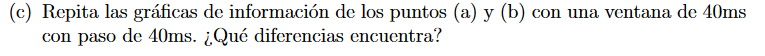

In [42]:
# todas las tasas de disparo en diccionario de neuronas
Ts=nrn.dicneuronrate(tiemposS1,neuronas,start=-2,stop=8,paso=0.04,ventana=0.04)
ms=dict() #diccionario para la media y la sigma totales de una neurona
for neuron in neuronas:
    mu=np.mean(Ts[neuron])
    sg=np.std(Ts[neuron])
    ms.update({neuron:(mu,sg)}) 
############## tasas de disparo en periodos 0 a 2s y 3 a 5s
Ts_p1=nrn.dicneuronrate(tiemposS1,neuronas,start=0,stop=2,paso=0.04,ventana=0.04)
Ts_p2=nrn.dicneuronrate(tiemposS1,neuronas,start=3,stop=5,paso=0.04,ventana=0.04)

El valor máximo de info_mutua de Shanon las neuronas usando z total es: 0.9187532760594896
Para la neuronas  0.28 s es el momento más informativo


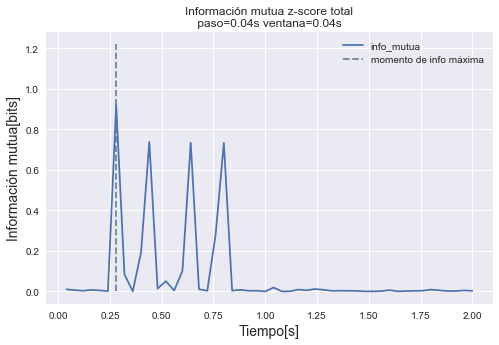

In [43]:
################# z-score total en primer periodo
zs_p1=dict()# diccionario vacio
for neuron in neuronas:
    z=nrn.zej11(Ts_p1[neuron],ms[neuron]) # cada z corresponde un array de z-score dónde cada
    zs_p1.update({neuron:z})
########## z-score separada de acuerdo a primer estímulo
zxest_1=nrn.txprimerest(zs_p1,neuronas,llaves1,bqs)#z separado
zest1_tot=nrn.ztot(zxest_1,neuronas,llaves1)
zest1_one=nrn.z_one(zest1_tot,llaves1)
probasest1=nrn.P_ventana_Tn(zest1_tot,zest1_one,10,llaves1)
esprob1={a:1/2 for a in llaves1}
bsup1,nven1=nrn.bordesup(start=0,stop=2,paso=0.04,ventana=0.04,nv=True)
shanon_est1=nrn.I_one(probasest1,llaves1,esprob1,nven1)  

####graficando de acuerdo al primer estímulo
y=shanon_est1['dtotal']
maximo=np.max(y)
minimo=np.min(y)
t_maxinfo=bsup1[np.nonzero(y==maximo)]
print('El valor máximo de info_mutua de Shanon las neuronas usando z total es:',maximo) 
print('Para la neuronas ',t_maxinfo[0],'s es el momento más informativo')
fig = plt.figure(figsize=(8,5))
plt.plot(bsup1,y,label='info_mutua')
plt.vlines(t_maxinfo,minimo,maximo+0.3,ls="--",color="slategray",label="momento de info máxima")
plt.xlabel("Tiempo[s]",fontsize=14)
plt.ylabel("Información mutua[bits]",fontsize=14)
plt.title("Información mutua z-score total\n paso=0.04s ventana=0.04s ")
plt.legend(fontsize="medium",shadow=True,fancybox=True)
plt.show()

C:\Users\sound\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\01.Quinto_Semestre\1.Modelos computacionales\1.Proba y Estadística\Practica 3\Ejercicio 11\NeuralFunctJC.py:636: RuntimeWarning: invalid value encountered in true_divide
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
C:\Users\sound\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\01.Quinto_Semestre\1.Modelos computacionales\1.Proba y Estadística\Practica 3\Ejercicio 11\NeuralFunctJC.py:636: RuntimeWarning: divide by zero encountered in log2
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
C:\Users\sound\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\01.Quinto_Semestre\1.Modelos computacionales\1.Proba y Estadística\Practica 3\Ejercicio 11\NeuralFunctJC.py:636: RuntimeWarning: invalid value encountered in multiply
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))


El valor máximo de info_mutua de Shanon las neuronas usando z total es: 0.905709886018323
Para la neuronas  3.32 s es el momento más informativo


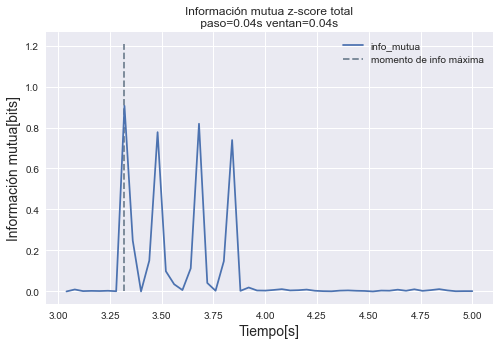

In [44]:
################# z-score en el segundo periodo
zs_p2=dict()# diccionario vacio
for neuron in neuronas:
    z=nrn.zej11(Ts_p2[neuron],ms[neuron]) # cada z corresponde un array de z-score dónde cada fila es un ensayo y cada columna un ventana temporal. En este caso el número de ensayos varía según la neurona pero el número de ventanas es 531
    zs_p2.update({neuron:z})# agrego un par llave:valor al diccionario de z por neurona
########## z-score separada de acuerdo a primer estímulo
zxest_2=nrn.txsegundoest(zs_p2,neuronas,llaves2,bqs)#z separado
zest2_tot=nrn.ztot(zxest_2,neuronas,llaves2)
zest2_one=nrn.z_one(zest2_tot,llaves2)
probasest2=nrn.P_ventana_Tn(zest2_tot,zest2_one,10,llaves2)
esprob2={a:1/2 for a in llaves2}
bsup2,nven2=nrn.bordesup(start=3,stop=5,paso=0.04,ventana=0.04,nv=True)
shanon_est2=nrn.I_one(probasest2,llaves2,esprob2,nven2) 

####graficando de acuerdo al segundo estímulo
y=shanon_est2['dtotal']
maximo=np.max(y)
minimo=np.min(y)
t_maxinfo=bsup2[np.nonzero(y==maximo)]
print('El valor máximo de info_mutua de Shanon las neuronas usando z total es:',maximo) 
print('Para la neuronas ',t_maxinfo[0],'s es el momento más informativo')
fig = plt.figure(figsize=(8,5))
plt.plot(bsup2,y,label='info_mutua')
plt.vlines(t_maxinfo,minimo,maximo+0.3,ls="--",color="slategray",label="momento de info máxima")
plt.xlabel("Tiempo[s]",fontsize=14)
plt.ylabel("Información mutua[bits]",fontsize=14)
plt.title("Información mutua z-score total\n paso=0.04s ventan=0.04s ")
plt.legend(fontsize="medium",shadow=True,fancybox=True)
plt.show()

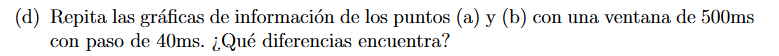

In [47]:
# todas las tasas de disparo en diccionario de neuronas
Ts=nrn.dicneuronrate(tiemposS1,neuronas,start=-2,stop=8,paso=0.04,ventana=0.5)
ms=dict() #diccionario para la media y la sigma totales de una neurona
for neuron in neuronas:
    mu=np.mean(Ts[neuron])
    sg=np.std(Ts[neuron])
    ms.update({neuron:(mu,sg)}) 
############## tasas de disparo en periodos 0 a 2s y 3 a 5s
Ts_p1=nrn.dicneuronrate(tiemposS1,neuronas,start=0,stop=2,paso=0.04,ventana=0.5)
Ts_p2=nrn.dicneuronrate(tiemposS1,neuronas,start=3,stop=5,paso=0.04,ventana=0.5)

C:\Users\sound\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\01.Quinto_Semestre\1.Modelos computacionales\1.Proba y Estadística\Practica 3\Ejercicio 11\NeuralFunctJC.py:636: RuntimeWarning: invalid value encountered in true_divide
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
C:\Users\sound\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\01.Quinto_Semestre\1.Modelos computacionales\1.Proba y Estadística\Practica 3\Ejercicio 11\NeuralFunctJC.py:636: RuntimeWarning: divide by zero encountered in log2
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
C:\Users\sound\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\01.Quinto_Semestre\1.Modelos computacionales\1.Proba y Estadística\Practica 3\Ejercicio 11\NeuralFunctJC.py:636: RuntimeWarning: invalid value encountered in multiply
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))


El valor máximo de info_mutua de Shanon las neuronas usando z total es: 0.3959181485679947
Para la neuronas  0.78 s es el momento más informativo


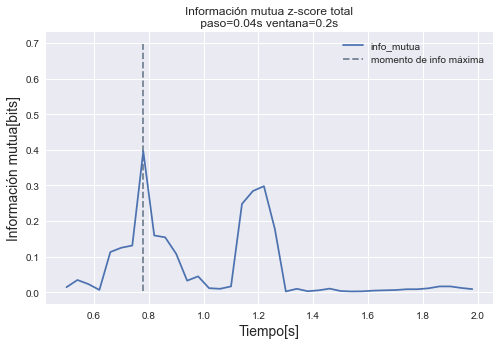

In [48]:
################# z-score total en primer periodo
zs_p1=dict()# diccionario vacio
for neuron in neuronas:
    z=nrn.zej11(Ts_p1[neuron],ms[neuron]) # cada z corresponde un array de z-score dónde cada
    zs_p1.update({neuron:z})
########## z-score separada de acuerdo a primer estímulo
zxest_1=nrn.txprimerest(zs_p1,neuronas,llaves1,bqs)#z separado
zest1_tot=nrn.ztot(zxest_1,neuronas,llaves1)
zest1_one=nrn.z_one(zest1_tot,llaves1)
probasest1=nrn.P_ventana_Tn(zest1_tot,zest1_one,10,llaves1)
esprob1={a:1/2 for a in llaves1}
bsup1,nven1=nrn.bordesup(start=0,stop=2,paso=0.04,ventana=0.5,nv=True)
shanon_est1=nrn.I_one(probasest1,llaves1,esprob1,nven1)  

####graficando de acuerdo al primer estímulo
y=shanon_est1['dtotal']
maximo=np.max(y)
minimo=np.min(y)
t_maxinfo=bsup1[np.nonzero(y==maximo)]
print('El valor máximo de info_mutua de Shanon las neuronas usando z total es:',maximo) 
print('Para la neuronas ',t_maxinfo[0],'s es el momento más informativo')
fig = plt.figure(figsize=(8,5))
plt.plot(bsup1,y,label='info_mutua')
plt.vlines(t_maxinfo,minimo,maximo+0.3,ls="--",color="slategray",label="momento de info máxima")
plt.xlabel("Tiempo[s]",fontsize=14)
plt.ylabel("Información mutua[bits]",fontsize=14)
plt.title("Información mutua z-score total\n paso=0.04s ventana=0.2s ")
plt.legend(fontsize="medium",shadow=True,fancybox=True)
plt.show()

C:\Users\sound\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\01.Quinto_Semestre\1.Modelos computacionales\1.Proba y Estadística\Practica 3\Ejercicio 11\NeuralFunctJC.py:636: RuntimeWarning: invalid value encountered in true_divide
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
C:\Users\sound\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\01.Quinto_Semestre\1.Modelos computacionales\1.Proba y Estadística\Practica 3\Ejercicio 11\NeuralFunctJC.py:636: RuntimeWarning: divide by zero encountered in log2
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
C:\Users\sound\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\01.Quinto_Semestre\1.Modelos computacionales\1.Proba y Estadística\Practica 3\Ejercicio 11\NeuralFunctJC.py:636: RuntimeWarning: invalid value encountered in multiply
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))


El valor máximo de info_mutua de Shanon las neuronas usando z total es: 0.3602798060088962
Para la neuronas  3.82 s es el momento más informativo


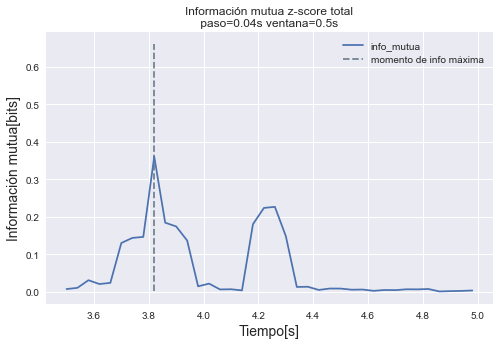

In [49]:
################# z-score en el segundo periodo
zs_p2=dict()# diccionario vacio
for neuron in neuronas:
    z=nrn.zej11(Ts_p2[neuron],ms[neuron]) # cada z corresponde un array de z-score dónde cada fila es un ensayo y cada columna un ventana temporal. En este caso el número de ensayos varía según la neurona pero el número de ventanas es 531
    zs_p2.update({neuron:z})# agrego un par llave:valor al diccionario de z por neurona
########## z-score separada de acuerdo a primer estímulo
zxest_2=nrn.txsegundoest(zs_p2,neuronas,llaves2,bqs)#z separado
zest2_tot=nrn.ztot(zxest_2,neuronas,llaves2)
zest2_one=nrn.z_one(zest2_tot,llaves2)
probasest2=nrn.P_ventana_Tn(zest2_tot,zest2_one,10,llaves2)
esprob2={a:1/2 for a in llaves2}
bsup2,nven2=nrn.bordesup(start=3,stop=5,paso=0.04,ventana=0.5,nv=True)
shanon_est2=nrn.I_one(probasest2,llaves2,esprob2,nven2) 

####graficando de acuerdo al segundo estímulo
y=shanon_est2['dtotal']
maximo=np.max(y)
minimo=np.min(y)
t_maxinfo=bsup2[np.nonzero(y==maximo)]
print('El valor máximo de info_mutua de Shanon las neuronas usando z total es:',maximo) 
print('Para la neuronas ',t_maxinfo[0],'s es el momento más informativo')
fig = plt.figure(figsize=(8,5))
plt.plot(bsup2,y,label='info_mutua')
plt.vlines(t_maxinfo,minimo,maximo+0.3,ls="--",color="slategray",label="momento de info máxima")
plt.xlabel("Tiempo[s]",fontsize=14)
plt.ylabel("Información mutua[bits]",fontsize=14)
plt.title("Información mutua z-score total\n paso=0.04s ventana=0.5s ")
plt.legend(fontsize="medium",shadow=True,fancybox=True)
plt.show()